<a href="https://colab.research.google.com/github/Jegge2003/DataInsightFinalProject/blob/main/universities_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.style as style 
%matplotlib inline

In [ ]:
#Setting the plotting style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [ ]:
#Uploading the dataset from local
from google.colab import files
files.upload()

In [ ]:
#Loading the dataset into a pandas dataframe
df = pd.read_csv('/content/universities.csv')

#Showing the first 5 rows
df.head()

,Year,Rank,Name,Point,City,Country
0,2018,1,Harvard University,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States


Data Investigation

In [ ]:
#Checking the columns of the dataset
df.columns

Index(['Year', 'Rank', 'Name', 'Point', 'City', 'Country'], dtype='object')

In [ ]:
#Shape of the dataset
df.shape

(5250, 6)

In [ ]:
#Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     5250 non-null   int64  
 1   Rank     5250 non-null   int64  
 2   Name     5250 non-null   object 
 3   Point    5030 non-null   float64
 4   City     5250 non-null   object 
 5   Country  5249 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 246.2+ KB


In [ ]:
#Describing the numerical columns of the dataset
df.describe()

,Year,Rank,Point
count,5250.000000,5250.000000,5030.000000
mean,2020.666667,174.803429,70.840040
std,1.247338,100.807265,8.128413
min,2018.000000,1.000000,57.500000
25%,2020.000000,88.000000,64.500000
50%,2021.000000,175.000000,69.100000
75%,2022.000000,262.000000,76.000000
max,2022.000000,350.000000,99.000000


In [ ]:
#Checking the count of Country column
df['Country'].value_counts()

 United States     1465
 United Kingdom     434
 Germany            416
 Australia          279
 Canada             220
 Italy              186
China               182
 Japan              169
 France             156
 Netherlands        140
 South Korea        119
 Sweden             119
 Spain              111
 Switzerland        105
 Belgium            105
 Brazil             101
 Taiwan              86
 Finland             64
 Denmark             62
 Ireland             60
 Israel              60
 South Africa        54
 Austria             51
 Portugal            46
 Malaysia            46
 Norway              45
 New Zealand         39
Hong Kong            35
 Thailand            30
 Chile               30
 Saudi Arabia        30
 Singapore           30
 Greece              30
 Turkey              25
 Czech Republic      19
 Egypt               16
 Mexico              15
 Hungary             15
 Argentina           15
 India               11
 Russia              10
 Lebanon        

In [ ]:
#Checking the count of the city column per country
df.groupby('Country')['City'].value_counts()

Country     City         
 Argentina  Buenos Aires     15
 Australia  Sydney           41
            Adelaide         31
            Brisbane         27
            Melbourne        26
                             ..
China       Xi'an             5
            Jinan             2
Hong Kong   Hong Kong        33
            -                 1
            Hong Kong SAR     1
Name: City, Length: 337, dtype: int64

In [ ]:
#Checking for missing values
df.isna().sum()

Year         0
Rank         0
Name         0
Point      220
City         0
Country      1
dtype: int64

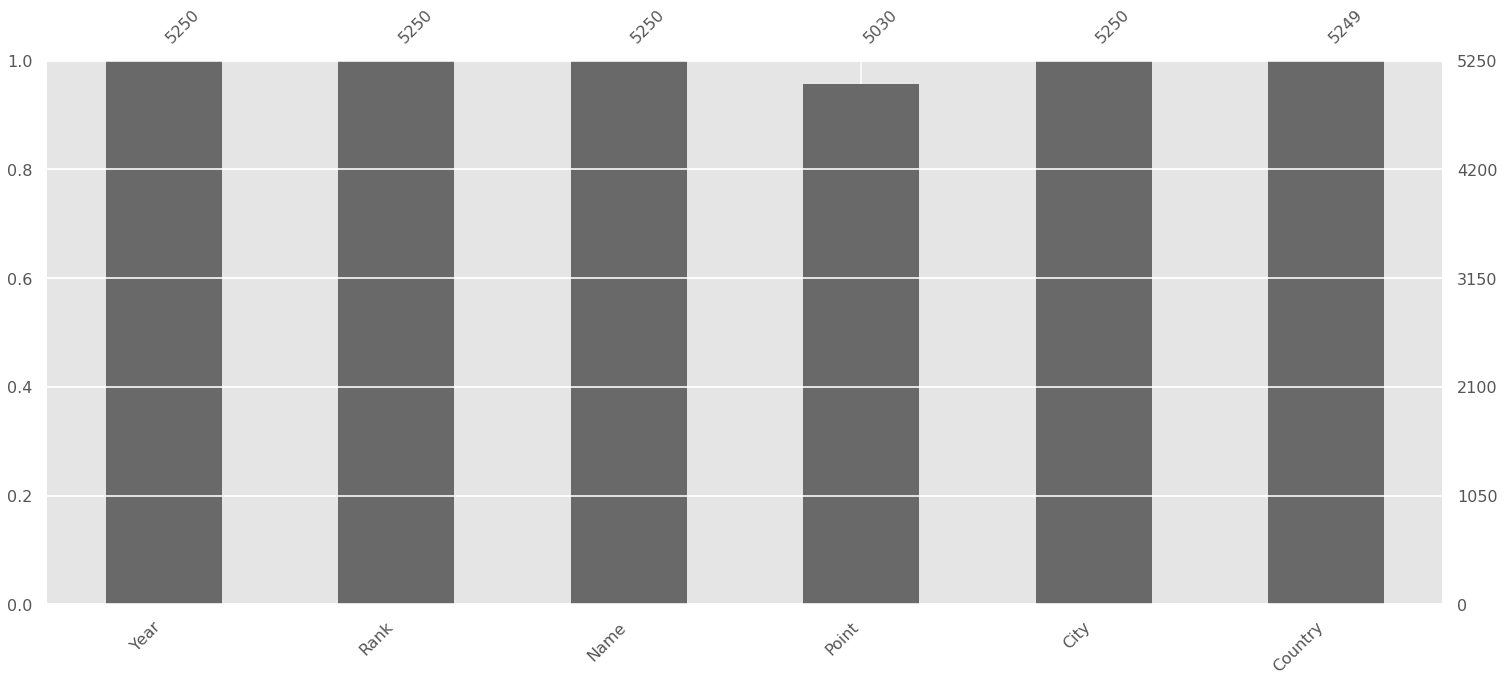

In [ ]:
#Visualizing missing values of each column
msno.bar(df)

In [ ]:
#Checking the unique countries in the dataset
df['Country'].unique()

array([' United States', ' United Kingdom', ' Sweden', ' Canada',
       ' Australia', ' Japan', ' Singapore', ' Denmark', ' Netherlands',
       ' South Korea', ' Germany', 'Hong Kong', ' Switzerland',
       ' Belgium', 'China', ' Finland', ' Taiwan', ' New Zealand',
       ' Spain', ' Italy', ' Norway', ' Ireland', ' South Africa',
       ' Brazil', ' France', ' Austria', ' Thailand', ' Mexico',
       ' Israel', ' Malaysia', ' Argentina', ' Chile', ' Czech Republic',
       ' Saudi Arabia', ' Portugal', ' Egypt', ' Greece', ' Hungary',
       ' Turkey', ' Russia', ' India', ' Pakistan', ' Lebanon',
       ' Estonia', nan, ' Czechia', ' Poland', ' Iran', ' Indonesia'],
      dtype=object)

In [ ]:
df.loc[df['Country'].isna()]

,Year,Rank,Name,Point,City,Country
4990,2022,90,Universit Paris-Saclay,75.4,Gif-sur-Yvette,NaN


In [ ]:
#Checking for duplicates in the dataset
df[df.duplicated()]

,Year,Rank,Name,Point,City,Country
1040,2019,338,University of Coimbra,NaN,Coimbra,Portugal
1740,2020,338,University of Coimbra,NaN,Coimbra,Portugal
1761,2020,12,Yale University,89.4,New Haven,United States
1845,2020,94,University of Otago,NaN,Dunedin,New Zealand
2790,2021,338,University of Coimbra,NaN,Coimbra,Portugal
2811,2021,12,Yale University,89.4,New Haven,United States
2895,2021,94,University of Otago,NaN,Dunedin,New Zealand
3154,2021,5,Johns Hopkins University,93.3,Baltimore,United States
3197,2021,48,University of Pittsburgh,80.4,Pittsburgh,United States
3199,2021,49,University of Glasgow,NaN,Glasgow,United Kingdom


Data Cleaning

In [ ]:
#Making a copy of dataset
df1 = df.copy()

In [ ]:
#Finding the exact input with no country
df1[df1['Country'].isna()]

,Year,Rank,Name,Point,City,Country
4990,2022,90,Universit Paris-Saclay,75.4,Gif-sur-Yvette,NaN


In [ ]:
#Filling NaN with France since the university is located in France
df1.loc[4990, 'Country'] = 'France'

In [ ]:
#Checking if the change has been effected
df1.isna().sum()

Year         0
Rank         0
Name         0
Point      220
City         0
Country      0
dtype: int64

In [ ]:
#Showing the rows with empty Point column
df1[df1['Point'].isna()]

,Year,Rank,Name,Point,City,Country
44,2018,45,University of Glasgow,NaN,Glasgow,United Kingdom
47,2018,48,University of Bristol,NaN,Bristol,United Kingdom
63,2018,64,University of Otago,NaN,Dunedin,New Zealand
99,2018,100,Newcastle University,NaN,Newcastle upon Tyne,United Kingdom
152,2018,151,Western University,NaN,London,Canada
...,...,...,...,...,...,...
5218,2022,319,University of South Australia,NaN,Adelaide,Australia
5222,2022,323,Universiti Kebangsaan Malaysia (UKM),NaN,Bangi,Malaysia
5223,2022,324,University of Technology Sydney,NaN,Haymarket,Australia
5234,2022,335,Ain Shams University,NaN,Cairo,Egypt


In [ ]:
#Making a copy of df1 dataset to effect changes on the Point column
df2 = df1.copy()

In [ ]:
#Getting the indices of all missing point rows
missing_points = df[df['Point'].isnull()].index.tolist()

In [ ]:
#Filling missing points with the average of the points before and after them
for i in missing_points:
  df2.at[i,'Point'] = (df2.loc[i-1, 'Point']+df2.loc[i+1, 'Point'])/2

In [ ]:
#Checking if all the columns have no empty values
df2.isna().sum()

Year       0
Rank       0
Name       0
Point      4
City       0
Country    0
dtype: int64

In [ ]:
#Displaying the empty rows
df2[df2['Point'].isna()]

,Year,Rank,Name,Point,City,Country
5135,2022,235,Curtin University,NaN,Perth,Australia
5136,2022,235,Universiti Putra Malaysia (UPM),NaN,Seri Kembangan,Malaysia
5222,2022,323,Universiti Kebangsaan Malaysia (UKM),NaN,Bangi,Malaysia
5223,2022,324,University of Technology Sydney,NaN,Haymarket,Australia


In [ ]:
#Showing the rows above and below indexes 5135 and 5136
df2.iloc[5134:5138]

,Year,Rank,Name,Point,City,Country
5134,2022,235,Chulalongkorn University,65.9,Bangkok,Thailand
5135,2022,235,Curtin University,NaN,Perth,Australia
5136,2022,235,Universiti Putra Malaysia (UPM),NaN,Seri Kembangan,Malaysia
5137,2022,235,University of Manitoba,65.9,Winnipeg,Canada


In [ ]:
#Filling indexes 5135 and 5136 Point columns with 65.9
df2.loc[[5135,5136], 'Point'] = 65.9

In [ ]:
#Showing the rows above and below indexes 5135 and 5136
df2.iloc[5221:5225]

,Year,Rank,Name,Point,City,Country
5221,2022,321,Sichuan University,62.1,Chengdu,China
5222,2022,323,Universiti Kebangsaan Malaysia (UKM),NaN,Bangi,Malaysia
5223,2022,324,University of Technology Sydney,NaN,Haymarket,Australia
5224,2022,324,Virginia Polytechnic Institute and State Unive...,61.9,Blacksburg,United States


In [ ]:
#Filling Point column of index 5223 with 61.9 since it has the same rank as index 5224
df2.loc[5223, 'Point'] = 61.9

In [ ]:
#Filling Point column of index 5222 with average of 5221 and 5223
df2.loc[5222, 'Point'] = (df2.loc[5221, 'Point']+df2.loc[5223, 'Point'])/2

In [ ]:
#Checking if all changes have been effected now
df2.isna().sum()

Year       0
Rank       0
Name       0
Point      0
City       0
Country    0
dtype: int64

In [ ]:
#Grouping dataset by years
df2_18 = df2[df2['Year']==2018]
df2_19 = df2[df2['Year']==2019]
df2_20 = df2[df2['Year']==2020]
df2_21 = df2[df2['Year']==2021]
df2_22 = df2[df2['Year']==2022]

Insights and Data Visualization

The major questions that will be tackled to gain the needed insights from the dataset are as follows:
1.  What top 5 countries have the highest cummulative ratings according to the dataset?
2.  Which countries have the most rated universities per year according the dataset?
3.  What are the top 10 universities in the world according to the points accumulated over the 4 years span according to the dataset?


What top 5 countries have the highest cummulative ratings per the dataset?

The approach to knowing this is by making a plot based on the countries which have the highest points since the higher the points, the better your rank. 

In [ ]:
#Grouping by countries and summing up the points
grouped_df2 = pd.DataFrame(df2.groupby('Country')['Point'].sum().sort_values(ascending=False))
grouped_df2

,Point
Country,
United States,105427.30
United Kingdom,32815.35
Germany,28648.70
Australia,19646.20
Canada,16129.60
Italy,12600.70
China,12366.60
Japan,11870.00
France,10722.70


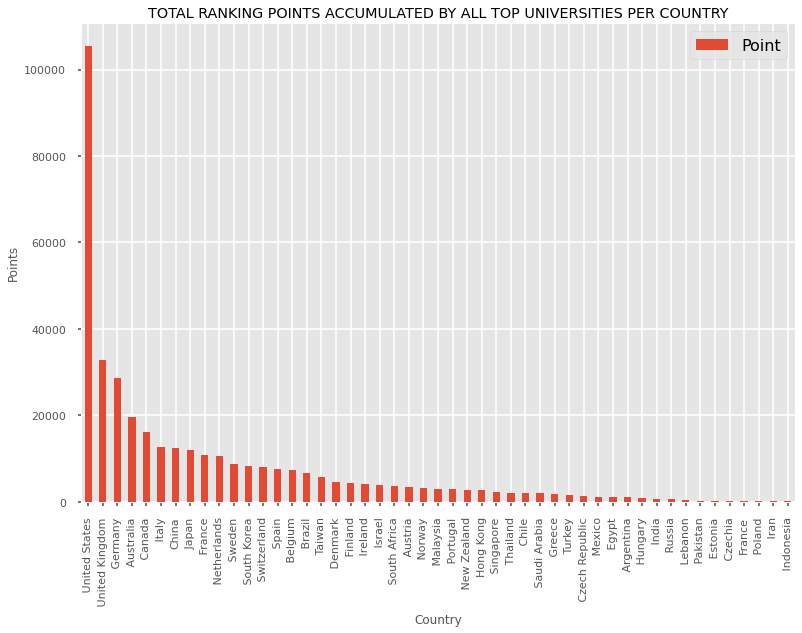

In [ ]:
#Plotting the graph
grouped_df2.plot(xlabel='Country', ylabel='Points', kind='bar', fontsize=11, title='TOTAL RANKING POINTS ACCUMULATED BY ALL TOP UNIVERSITIES PER COUNTRY')

Which countries have the most rated universities per year according to the dataset?

This can be answered by plotting the count of universities for each country within the various years.

In [ ]:
#Grouping dataset by years
groupdf2_18 = df2_18.groupby('Country')['Name'].count()
groupdf2_19 = df2_19.groupby('Country')['Name'].count()
groupdf2_20 = df2_20.groupby('Country')['Name'].count()
groupdf2_21 = df2_21.groupby('Country')['Name'].count()
groupdf2_22 = df2_22.groupby('Country')['Name'].count()

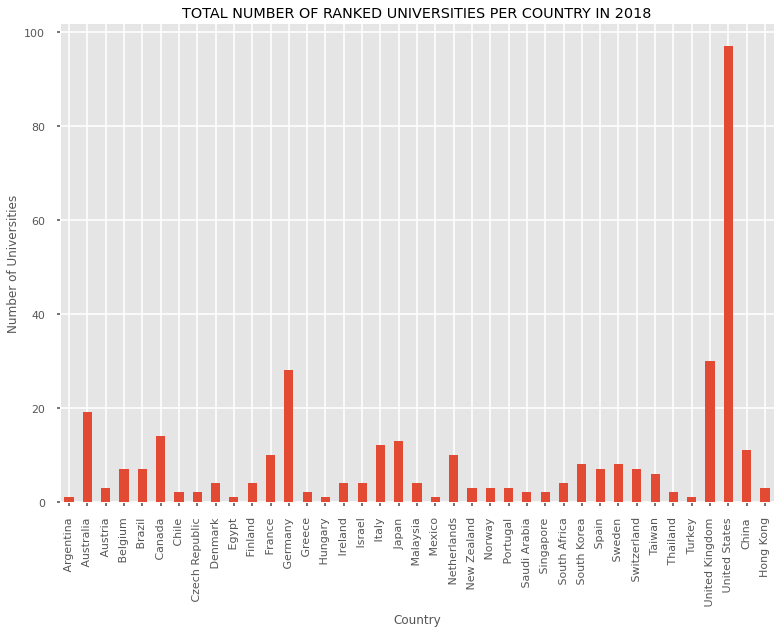

In [ ]:
#Plotting total number of universities per country for 2018
groupdf2_18.plot(xlabel='Country', ylabel='Number of Universities', kind='bar', fontsize=11, title='TOTAL NUMBER OF RANKED UNIVERSITIES PER COUNTRY IN 2018')

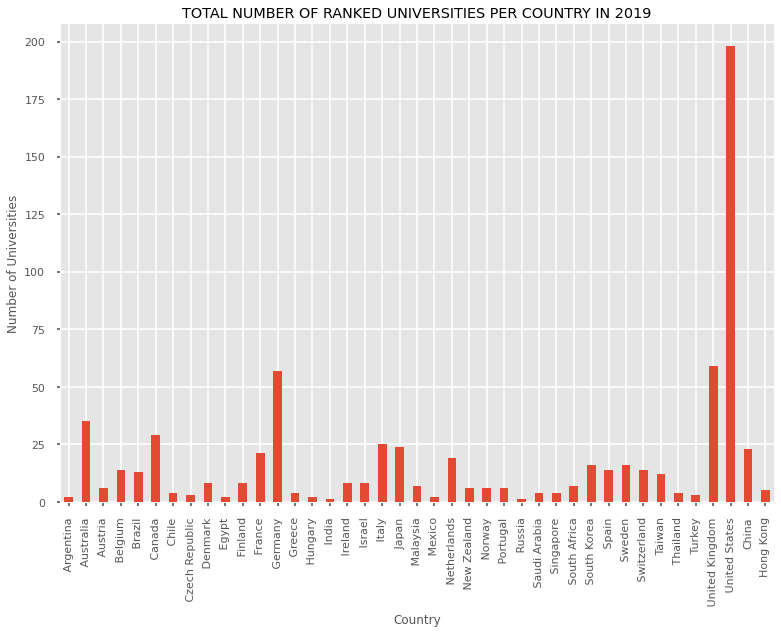

In [ ]:
#Plotting total number of universities per country for 2019
groupdf2_19.plot(xlabel='Country', ylabel='Number of Universities', kind='bar', fontsize=11, title='TOTAL NUMBER OF RANKED UNIVERSITIES PER COUNTRY IN 2019')

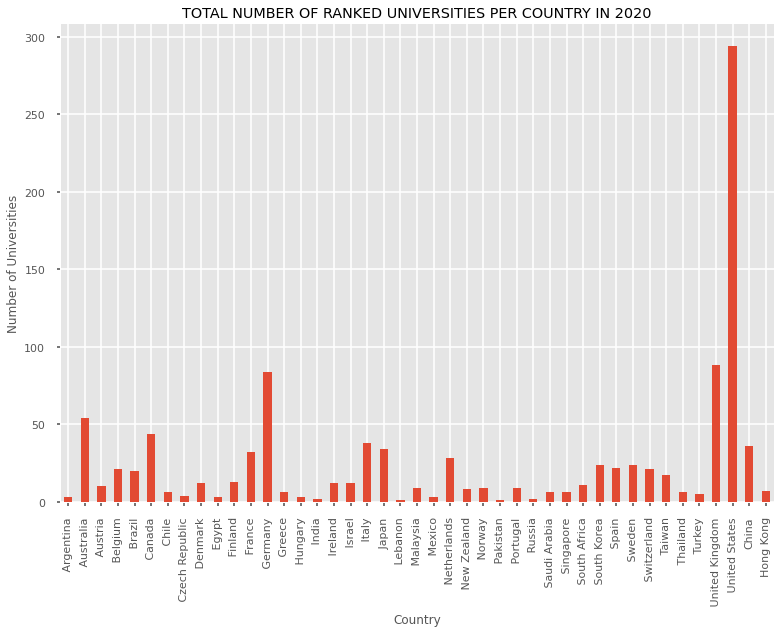

In [ ]:
#Plotting total number of universities per country for 2020
groupdf2_20.plot(xlabel='Country', ylabel='Number of Universities', kind='bar', fontsize=11, title='TOTAL NUMBER OF RANKED UNIVERSITIES PER COUNTRY IN 2020')

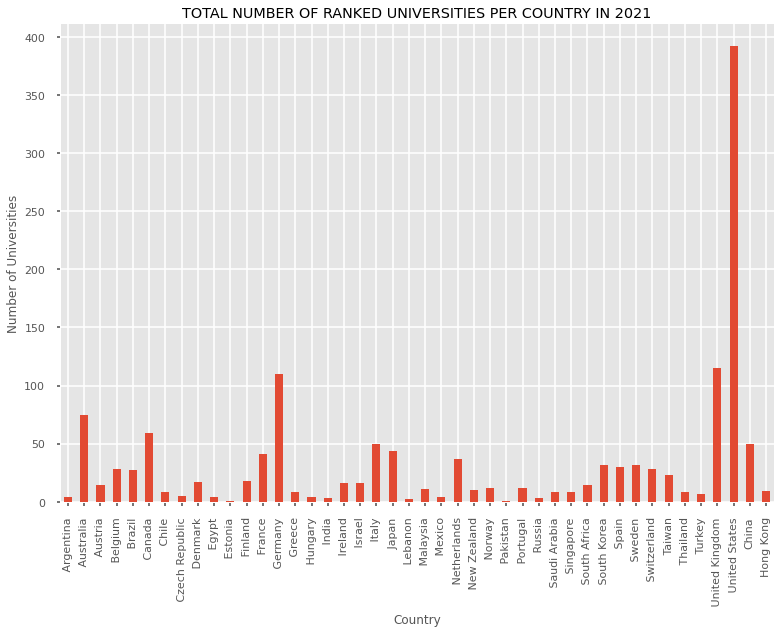

In [ ]:
#Plotting total number of universities per country for 2021
groupdf2_21.plot(xlabel='Country', ylabel='Number of Universities', kind='bar', fontsize=11, title='TOTAL NUMBER OF RANKED UNIVERSITIES PER COUNTRY IN 2021')

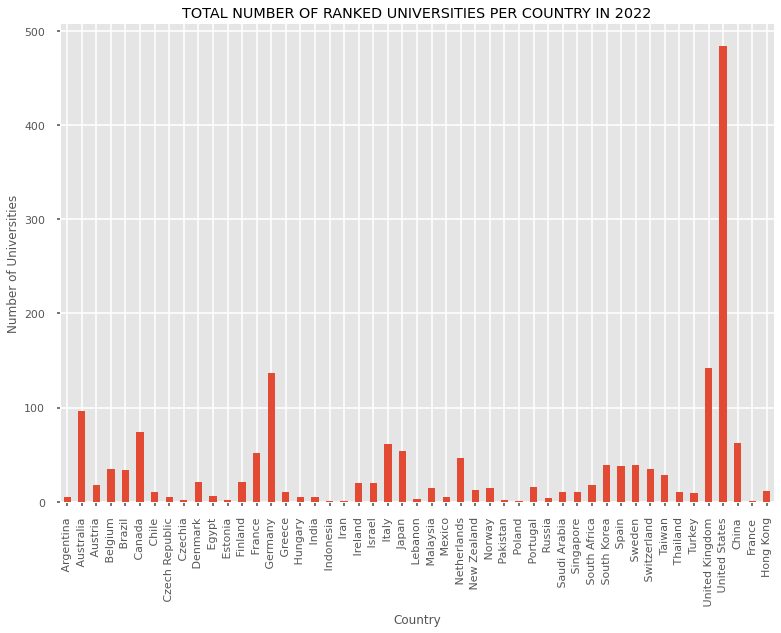

In [ ]:
#Plotting total number of universities per country for 2022
groupdf2_22.plot(xlabel='Country', ylabel='Number of Universities', kind='bar', fontsize=11, title='TOTAL NUMBER OF RANKED UNIVERSITIES PER COUNTRY IN 2022')

What are the top 10 universities in the world according to the points accumulated over the 4 years span according to the dataset?

This can be found by finding the average of the top 30 universities rankings and their points as well from 2018 to 2022. 30 is chosen to cater for any weird changes

In [ ]:
#Taking the top 30 universities for each year
top30_18 = df2_18.head(30)
top30_19 = df2_19.head(30)
top30_20 = df2_20.head(30)
top30_21 = df2_21.head(30)
top30_22 = df2_22.head(30)

In [ ]:
#Merging the top 30 universities from various years into one
df_18_19 = pd.merge(top30_18,top30_19, on='Name',suffixes=['_2018','_2019'])
df_18_19_20 = pd.merge(df_18_19,top30_20, on='Name')
df_18_19_20_21 = pd.merge(df_18_19_20,top30_21, on='Name')
df_18_19_20_21_22 = pd.merge(df_18_19_20_21,top30_22, on='Name')
df_18_19_20_21_22

,Year_2018,Rank_2018,Name,Point_2018,City_2018,Country_2018,Year_2019,Rank_2019,Point_2019,City_2019,...,Year_y,Rank_y,Point_y,City_y,Country_y,Year,Rank,Point,City,Country
0,2018,1,Harvard University,97.7,Cambridge,United States,2019,1,97.7,Cambridge,...,2021,1,97.7,Cambridge,United States,2022,1,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,Cambridge,United Kingdom,2019,2,94.6,Cambridge,...,2021,2,94.6,Cambridge,United Kingdom,2022,2,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,Oxford,United Kingdom,2019,2,94.6,Oxford,...,2021,2,94.6,Oxford,United Kingdom,2022,2,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,Cambridge,United States,2019,4,92.5,Cambridge,...,2021,4,92.5,Cambridge,United States,2022,4,92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,Baltimore,United States,2019,5,92.1,Baltimore,...,2021,5,92.1,Baltimore,United States,2022,5,92.1,Baltimore,United States
5,2018,5,Stanford University,92.1,Stanford,United States,2019,5,92.1,Stanford,...,2021,5,92.1,Stanford,United States,2022,5,92.1,Stanford,United States
6,2018,7,Karolinska Institutet,90.2,Stockholm,Sweden,2019,7,90.2,Stockholm,...,2021,7,90.2,Stockholm,Sweden,2022,7,90.2,Stockholm,Sweden
7,2018,8,UCL,88.6,London,United Kingdom,2019,8,88.6,London,...,2021,8,88.6,London,United Kingdom,2022,8,88.6,London,United Kingdom
8,2018,9,"University of California, Los Angeles (UCLA)",88.5,Los Angeles,United States,2019,9,88.5,Los Angeles,...,2021,9,88.5,Los Angeles,United States,2022,9,88.5,Los Angeles,United States
9,2018,10,"University of California, San Francisco",88.1,San Francisco,United States,2019,10,88.1,San Francisco,...,2021,10,88.1,San Francisco,United States,2022,10,88.1,San Francisco,United States


In [ ]:
#Making a copy of the merge datasets
df_combined = df_18_19_20_21_22.copy()

In [ ]:
#Displaying the columns of the combined dataset
df_combined.columns

Index(['Year_2018', 'Rank_2018', 'Name', 'Point_2018', 'City_2018',
       'Country_2018', 'Year_2019', 'Rank_2019', 'Point_2019', 'City_2019',
       'Country_2019', 'Year_x', 'Rank_x', 'Point_x', 'City_x', 'Country_x',
       'Year_y', 'Rank_y', 'Point_y', 'City_y', 'Country_y', 'Year', 'Rank',
       'Point', 'City', 'Country'],
      dtype='object')

In [ ]:
#Dropping the unnecessary columns
df_combined.drop(['City_2018', 'Country_2018', 'City_2019', 'Country_2019', 'City_y', 'City_x', 'Country_x', 'Country_y'], axis=1,inplace=True)
df_combined

,Year_2018,Rank_2018,Name,Point_2018,Year_2019,Rank_2019,Point_2019,Year_x,Rank_x,Point_x,Year_y,Rank_y,Point_y,Year,Rank,Point,City,Country
0,2018,1,Harvard University,97.7,2019,1,97.7,2020,1,97.7,2021,1,97.7,2022,1,97.7,Cambridge,United States
1,2018,2,University of Cambridge,94.6,2019,2,94.6,2020,2,94.6,2021,2,94.6,2022,2,94.6,Cambridge,United Kingdom
2,2018,2,University of Oxford,94.6,2019,2,94.6,2020,2,94.6,2021,2,94.6,2022,2,94.6,Oxford,United Kingdom
3,2018,4,Massachusetts Institute of Technology (MIT),92.5,2019,4,92.5,2020,4,92.5,2021,4,92.5,2022,4,92.5,Cambridge,United States
4,2018,5,Johns Hopkins University,92.1,2019,5,92.1,2020,5,92.1,2021,5,92.1,2022,5,92.1,Baltimore,United States
5,2018,5,Stanford University,92.1,2019,5,92.1,2020,5,92.1,2021,5,92.1,2022,5,92.1,Stanford,United States
6,2018,7,Karolinska Institutet,90.2,2019,7,90.2,2020,7,90.2,2021,7,90.2,2022,7,90.2,Stockholm,Sweden
7,2018,8,UCL,88.6,2019,8,88.6,2020,8,88.6,2021,8,88.6,2022,8,88.6,London,United Kingdom
8,2018,9,"University of California, Los Angeles (UCLA)",88.5,2019,9,88.5,2020,9,88.5,2021,9,88.5,2022,9,88.5,Los Angeles,United States
9,2018,10,"University of California, San Francisco",88.1,2019,10,88.1,2020,10,88.1,2021,10,88.1,2022,10,88.1,San Francisco,United States


In [ ]:
#Renaming the columns for more meaning
df_combined.rename(columns={'Year_x':'Year_2020', 'Rank_x':'Rank_2020', 'Point_x':'Point_2020',
                            'Year_y':'Year_2021', 'Rank_y':'Rank_2021', 'Point_y':'Point_2021', 
                            'Year':'Year_2022', 'Rank':'Rank_2022', 'Point':'Point_2022'}, inplace=True)

In [ ]:
#Rearranging the columns
df_combined = df_combined[['Name','City', 'Country', 'Year_2018', 'Rank_2018', 'Point_2018', 'Year_2019', 'Rank_2019',
       'Point_2019', 'Year_2020', 'Rank_2020', 'Point_2020', 'Year_2021', 'Rank_2021',
       'Point_2021', 'Year_2022', 'Rank_2022', 'Point_2022']]

In [ ]:
#Removing the years columns
df_combined.drop(['Year_2018', 'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022'], inplace=True, axis=1)
df_combined.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Name,City,Country,Rank_2018,Point_2018,Rank_2019,Point_2019,Rank_2020,Point_2020,Rank_2021,Point_2021,Rank_2022,Point_2022
0,Harvard University,Cambridge,United States,1,97.7,1,97.7,1,97.7,1,97.7,1,97.7
1,University of Cambridge,Cambridge,United Kingdom,2,94.6,2,94.6,2,94.6,2,94.6,2,94.6
2,University of Oxford,Oxford,United Kingdom,2,94.6,2,94.6,2,94.6,2,94.6,2,94.6
3,Massachusetts Institute of Technology (MIT),Cambridge,United States,4,92.5,4,92.5,4,92.5,4,92.5,4,92.5
4,Johns Hopkins University,Baltimore,United States,5,92.1,5,92.1,5,92.1,5,92.1,5,92.1


In [ ]:
#Creating average columns for rank and point
df_combined['Average_Rank'] = (df_combined['Rank_2018']+df_combined['Rank_2019']+df_combined['Rank_2020']+df_combined['Rank_2021']+df_combined['Rank_2022'])//5
df_combined['Average_Point'] = (df_combined['Point_2018']+df_combined['Point_2019']+df_combined['Point_2020']+df_combined['Point_2021']+df_combined['Point_2022'])/5

In [ ]:
#Sorting dataset by Average Point Column
df_combined.sort_values(by=['Average_Point'],ascending=False)

,Name,City,Country,Rank_2018,Point_2018,Rank_2019,Point_2019,Rank_2020,Point_2020,Rank_2021,Point_2021,Rank_2022,Point_2022,Average_Rank,Average_Point
0,Harvard University,Cambridge,United States,1,97.7,1,97.7,1,97.7,1,97.7,1,97.7,1,97.7
1,University of Cambridge,Cambridge,United Kingdom,2,94.6,2,94.6,2,94.6,2,94.6,2,94.6,2,94.6
2,University of Oxford,Oxford,United Kingdom,2,94.6,2,94.6,2,94.6,2,94.6,2,94.6,2,94.6
3,Massachusetts Institute of Technology (MIT),Cambridge,United States,4,92.5,4,92.5,4,92.5,4,92.5,4,92.5,4,92.5
4,Johns Hopkins University,Baltimore,United States,5,92.1,5,92.1,5,92.1,5,92.1,5,92.1,5,92.1
5,Stanford University,Stanford,United States,5,92.1,5,92.1,5,92.1,5,92.1,5,92.1,5,92.1
6,Karolinska Institutet,Stockholm,Sweden,7,90.2,7,90.2,7,90.2,7,90.2,7,90.2,7,90.2
7,UCL,London,United Kingdom,8,88.6,8,88.6,8,88.6,8,88.6,8,88.6,8,88.6
8,"University of California, Los Angeles (UCLA)",Los Angeles,United States,9,88.5,9,88.5,9,88.5,9,88.5,9,88.5,9,88.5
9,"University of California, San Francisco",San Francisco,United States,10,88.1,10,88.1,10,88.1,10,88.1,10,88.1,10,88.1
